<span style="font-size:25px; font-weight:bold">Paisabazar Classification </span>


<span style="font-size:15px"><strong>Project Type</strong> - EDA and Classification</span>


<span style="font-size:25px; font-weight:bold">Project Summary </span>

This project focuses on building a credit score classification model for Paisabazaar, a financial services platform that helps customers access loans and credit products. Given the importance of credit scores in assessing loan eligibility and risk, the goal is to predict whether a customer has a **Good**, **Standard**, or **Poor** credit score using financial and behavioral data such as income, loan history, credit utilization, and payment behavior.

The dataset was preprocessed by handling missing values, encoding categorical features, and scaling numerical columns. Various models were explored, including **Random Forest**, **XGBoost**, and **CatBoost**, with label encoding applied to the target variable. The CatBoostClassifier was ultimately used due to its efficiency with tabular data and minimal need for extensive preprocessing, aiming to deliver accurate credit score predictions to support better financial decision-making.


<span style="font-size:25px; font-weight:bold">Github Link </span>

https://github.com/aritra123x/PaisaBazar-Classification

<span style="font-size:25px; font-weight:bold">Problem Statement </span>


The core problem addressed in this project is the **accurate classification of credit scores** for individuals using their financial, transactional, and behavioral data. Credit scores play a crucial role in determining an individual's creditworthiness — which impacts loan approvals, interest rates, and overall risk management for financial institutions like **Paisabazaar**.

The challenge is to build a **predictive machine learning model** that classifies customers into one of three credit score categories: **Poor**, **Standard**, or **Good**. By doing so, Paisabazaar can streamline its credit assessment process, minimize loan defaults, and offer more personalized and data-driven financial recommendations to its users. The model must effectively learn from complex patterns in features such as income, loan behavior, payment history, and credit utilization to make accurate and actionable predictions.


<span style="font-size:20px">Importing Libraries</span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<span style="font-size:20px">Dataset Loading</span>

In [23]:
df=pd.read_csv('dataset-2.csv')

<span style="font-size:20px">Viewing Dataset</span>

In [25]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


<span style="font-size:15px">Dataset Rows and Columns Count</span>

In [20]:
df.shape

(100000, 28)

<span style="font-size:15px">Dataset Information</span>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [23]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [33]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [27]:
df['Type_of_Loan'] = df['Type_of_Loan'].astype(str).str.strip()

# Define values considered as missing
missing_values = ['no data', 'not specified', '']

# Convert to lowercase for consistent comparison
missing_mask = df['Type_of_Loan'].str.lower().isin(missing_values)

# Calculate percentage
missing_percentage = missing_mask.mean() * 100

# Output
print(f"Percentage of missing values: {missing_percentage:.2f}%")


Percentage of missing values: 12.82%


In [29]:
df['Type_of_Loan'] = df['Type_of_Loan'].astype(str).str.strip()

# Define what counts as missing
missing_values = ['no data', 'not specified', '']

# Drop rows with missing loan types directly from df
df = df[~df['Type_of_Loan'].str.lower().isin(missing_values)]

df.reset_index(drop=True, inplace=True)

print(f"Remaining rows after dropping: {len(df)}")

Remaining rows after dropping: 87184


In [31]:
df['Type_of_Loan'] = df['Type_of_Loan'].astype(str)

# Step 2: Remove extra spaces and split by comma
loan_list = df['Type_of_Loan'].str.replace("and", ",")  # make "and" into comma
loan_list = loan_list.str.split(',')

# Step 3: Flatten the list and strip whitespace
all_loans = loan_list.explode().str.strip()

# Step 4: Filter out irrelevant entries
valid_loans = all_loans[~all_loans.str.lower().isin(['no data', 'not specified', ''])]

# Step 5: Get unique loan types
unique_loan_types = valid_loans.unique()
loan_type_count = len(unique_loan_types)

# Output
print("Different Types of Loans:")
print(unique_loan_types)
print("\nTotal Number of Different Loan Types:", loan_type_count)


Different Types of Loans:
['Auto Loan' 'Credit-Builder Loan' 'Personal Loan' 'Home Equity Loan'
 'Mortgage Loan' 'Student Loan' 'Debt Consolidation Loan' 'Payday Loan']

Total Number of Different Loan Types: 8


In [33]:
# Replace "and" with comma and standardize spacing
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and', ',').str.strip()

# Split multiple loan types into lists
df['Loan_List'] = df['Type_of_Loan'].str.split(',')

# Strip whitespace from each element
df['Loan_List'] = df['Loan_List'].apply(lambda loans: [loan.strip() for loan in loans])

# Use MultiLabelBinarizer for binary encoding
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
loan_dummies = pd.DataFrame(mlb.fit_transform(df['Loan_List']), 
                            columns=mlb.classes_)

df = pd.concat([df.drop(columns=['Type_of_Loan', 'Loan_List']), loan_dummies], axis=1)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,1,1,1,0,1,0,0,0,1,0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,1,1,1,0,1,0,0,0,1,0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,1,1,1,0,1,0,0,0,1,0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,1,1,1,0,1,0,0,0,1,0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,1,1,1,0,1,0,0,0,1,0


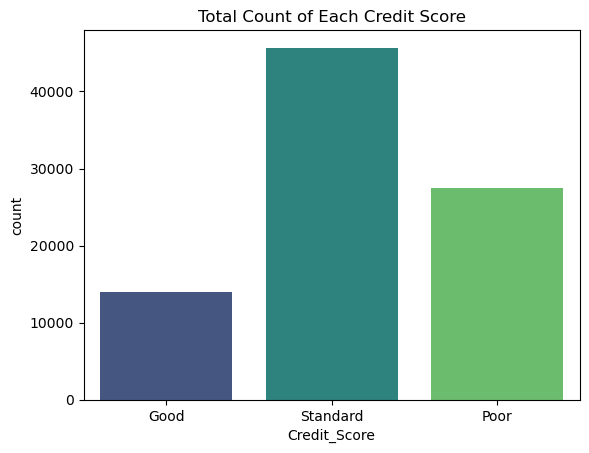

In [15]:
sns.countplot(x='Credit_Score',data=df,hue='Credit_Score',palette='viridis')
plt.title('Total Count of Each Credit Score')
plt.show()

**1. Why did you pick the specific chart?**

A **bar chart** is ideal for visualizing **categorical distributions**, such as the number of individuals in each **credit score class**—Good, Standard, and Poor. It provides a clear, direct comparison of how many customers fall into each category, helping us identify **class imbalance** in the dataset.

---

**2. What is/are the insight(s) found from the chart?**

* The **'Standard'** credit score category has the **highest number of customers**, followed by **'Poor'**, and finally **'Good'**, which has the lowest count.
* This indicates a **class imbalance** in the target variable, which is critical to address during model training (e.g., using stratified sampling or class weights).
* The relatively low number of “Good” scores may suggest **stringent credit conditions** or **conservative approval practices** by Paisabazaar’s partner institutions.

---

**3. Will the gained insights help create a positive business impact? Any negative impacts?**

**Positive Impact:**

* Understanding this distribution helps **tune the machine learning model** for better classification performance, especially for minority classes (e.g., 'Good').
* Business stakeholders can focus on **upskilling or supporting 'Standard' and 'Poor' customers** to improve their financial habits, boosting future creditworthiness and product eligibility.
* It enables **personalized financial advice**, targeting the majority group with risk mitigation strategies.

**No Insight Leading to Negative Growth:**

* However, if the imbalance is not handled properly, the model may become **biased toward predicting the majority class**, reducing real-world accuracy and harming customer trust.
* Therefore, it's crucial to apply balancing techniques during modeling.
s**, or **sampling techniques**.


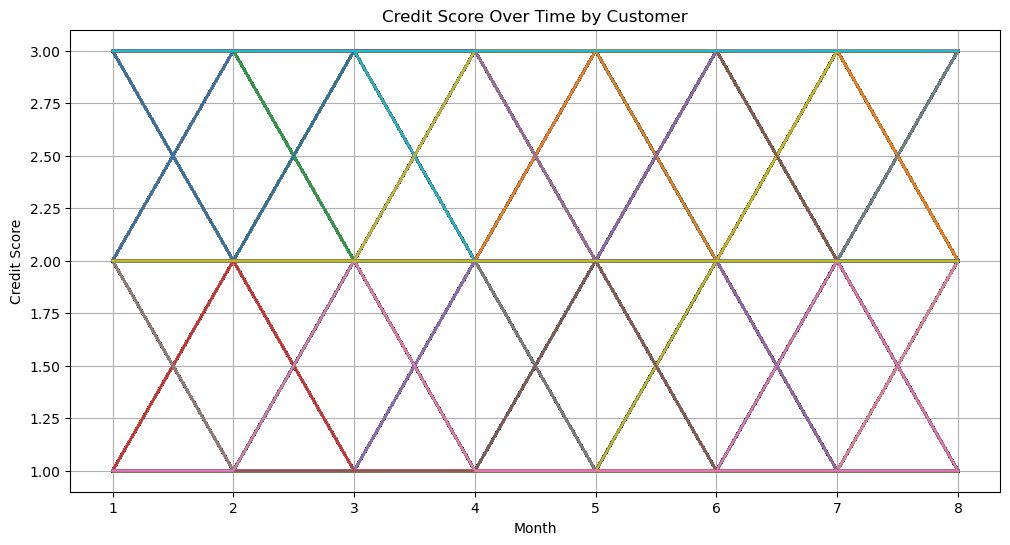

In [82]:
df['Credit_Score_Encoded'] = df['Credit_Score'].map({'Poor': 1, 'Standard': 2, 'Good': 3})
pivot_df = df.pivot_table(index='Month', columns='Customer_ID', values='Credit_Score_Encoded')
pivot_df.plot(figsize=(12, 6), legend=False)
plt.title('Credit Score Over Time by Customer')
plt.ylabel('Credit Score')
plt.xlabel('Month')
plt.grid(True)
plt.show()



### **1. Why did you pick the specific chart?**

A **line chart** is suitable for visualizing **changes over time**, especially when tracking a variable across multiple time points. In this case, plotting the **credit score trends for individual customers across months** helps identify stability, volatility, or shifts in their financial behavior.

---

### **2. What is/are the insight(s) found from the chart?**

* Credit scores for many customers **fluctuate sharply** between months, indicating inconsistency in credit-related behavior or financial activity.
* Some customers maintain a **stable credit score** over time, especially at the highest level (`3 = Good`), while others oscillate between `Poor (1)` and `Standard (2)` frequently.
* This volatility might indicate **irregular payment behavior**, changes in loan or credit usage, or underlying financial instability for certain groups.

---

### **3. Will the gained insights help create a positive business impact? Any negative impacts?**

**Positive Impact:**

* Customers with **consistent upward trends** or **stable high scores** can be targeted for **pre-approved offers** or premium financial products.
* Those with **frequent drops** in credit scores can be flagged for **risk mitigation**, such as closer credit monitoring, alerts, or intervention.
* Helps improve **credit risk models** by incorporating credit score volatility as a predictive feature.

**No Insight Leading to Negative Growth:**

* However, **if ignored**, highly fluctuating scores may lead to **misclassification of creditworthiness**, increasing loan default risks or missed lending opportunities.
* Additionally, inconsistent scoring may signal **data quality issues**, so patterns like these should be validated before drawing financial conclusions.


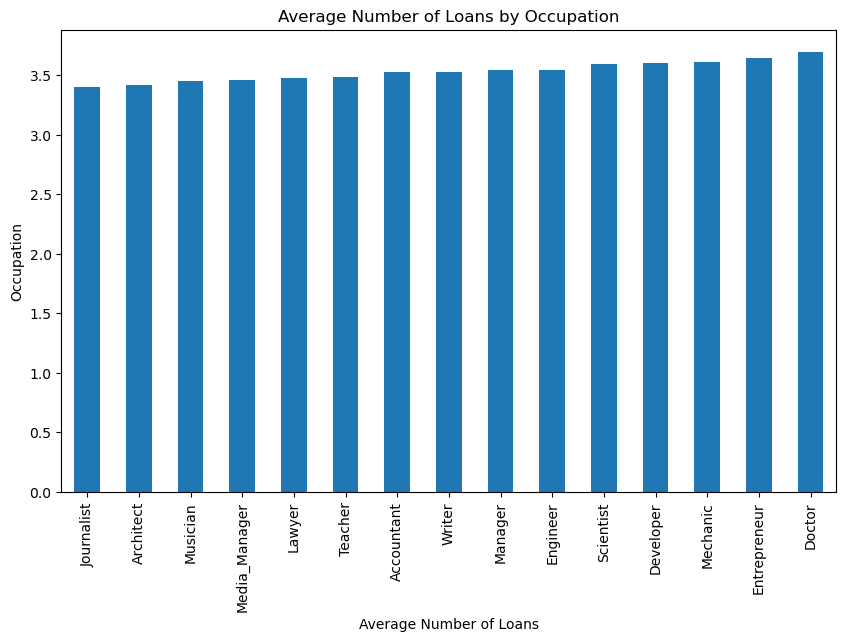

In [100]:
loan_by_occupation = df.groupby('Occupation')['Num_of_Loan'].mean().sort_values()
loan_by_occupation.plot(kind='bar', figsize=(10, 6))
plt.title('Average Number of Loans by Occupation')
plt.xlabel('Average Number of Loans')
plt.ylabel('Occupation')
plt.show()

### **1. Why did you pick the specific chart?**

A **line chart** is suitable for visualizing **changes over time**, especially when tracking a variable across multiple time points. In this case, plotting the **credit score trends for individual customers across months** helps identify stability, volatility, or shifts in their financial behavior.

---

### **2. What is/are the insight(s) found from the chart?**

* Credit scores for many customers **fluctuate sharply** between months, indicating inconsistency in credit-related behavior or financial activity.
* Some customers maintain a **stable credit score** over time, especially at the highest level (`3 = Good`), while others oscillate between `Poor (1)` and `Standard (2)` frequently.
* This volatility might indicate **irregular payment behavior**, changes in loan or credit usage, or underlying financial instability for certain groups.

---

### **3. Will the gained insights help create a positive business impact? Any negative impacts?**

**Positive Impact:**

* Customers with **consistent upward trends** or **stable high scores** can be targeted for **pre-approved offers** or premium financial products.
* Those with **frequent drops** in credit scores can be flagged for **risk mitigation**, such as closer credit monitoring, alerts, or intervention.
* Helps improve **credit risk models** by incorporating credit score volatility as a predictive feature.

**No Insight Leading to Negative Growth:**

* However, **if ignored**, highly fluctuating scores may lead to **misclassification of creditworthiness**, increasing loan default risks or missed lending opportunities.
* Additionally, inconsistent scoring may signal **data quality issues**, so patterns like these should be validated before drawing financial conclusions.


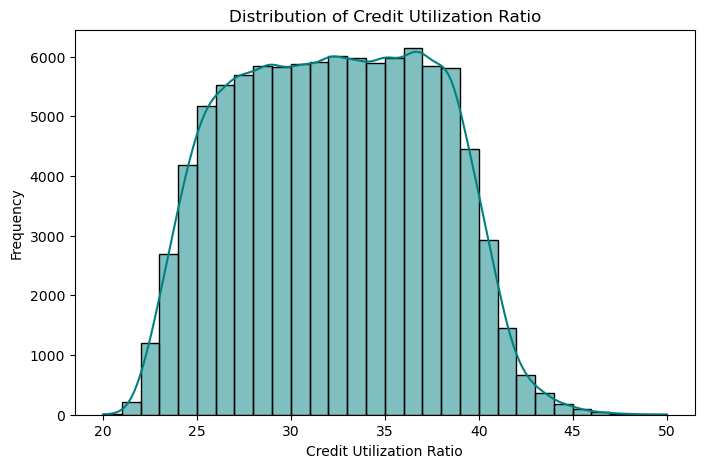

In [102]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Credit_Utilization_Ratio'], bins=30, kde=True, color='teal')
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()


### **1. Why did you pick the specific chart?**

A **histogram with KDE (Kernel Density Estimate)** is ideal for visualizing the **distribution of a continuous variable**. In this case, it shows how **credit utilization ratios** are distributed across the customer base, providing insights into typical credit usage behavior and helping identify outliers or skewed patterns.

---

### **2. What is/are the insight(s) found from the chart?**

* The distribution is **approximately symmetric** with a slight **left skew**, indicating that most customers have a **credit utilization ratio between 25 and 38**.
* The **peak frequency** is around the **30–36 range**, which appears to be the most common usage band.
* Very **few customers exceed 45%** utilization, which may be a red flag for **credit overuse or financial stress**.

---

### **3. Will the gained insights help create a positive business impact? Any negative impacts?**

**Positive Impact:**

* Lenders can use this data to **set risk thresholds**, flagging accounts with **very high utilization ratios** for closer monitoring.
* Helps in **segmenting customers** into risk categories for personalized loan limits, interest rates, or credit improvement advice.
* Supports building **features for credit score prediction models**.

**No Insight Leading to Negative Growth:**

* If the **extreme utilizations** are ignored, it could lead to **missed early warning signs** of customer default.
* Assuming all utilization levels are equally safe may **undermine risk assessments**, especially in customers nearing their credit limits.

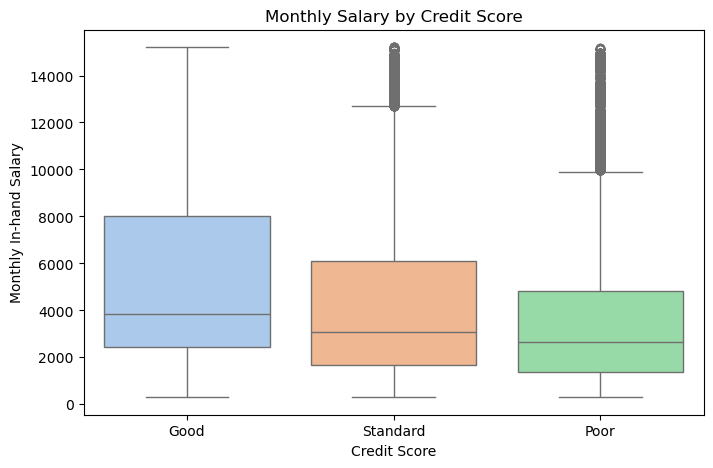

In [110]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary',hue='Credit_Score', data=df, palette='pastel')
plt.title('Monthly Salary by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Monthly In-hand Salary')
plt.show()



### **1. Why did you pick the specific chart?**

A **box plot** is ideal for comparing the **distribution and spread** of a continuous variable across **different categories**. In this case, it shows how **monthly in-hand salary** varies among customers with different **credit score categories**—Good, Standard, and Poor. It effectively highlights **median values**, **interquartile range**, and **outliers**, giving a clear view of income-related patterns.

---

### **2. What is/are the insight(s) found from the chart?**

* Customers with a **Good credit score** generally have a **higher median monthly salary** compared to those in the Standard and Poor categories.
* There is a **wider range** of salaries in the Good group, suggesting more variability but also higher earning potential.
* Customers with **Poor credit scores** tend to have **lower in-hand salaries**, with a lower median and tighter distribution.
* **Outliers** are present in all categories, indicating that some individuals earn significantly more than the typical range.

---

### **3. Will the gained insights help create a positive business impact? Any negative impacts?**

**Positive Impact:**

* This insight supports the idea that **higher income correlates with better creditworthiness**, which can inform **credit risk models** and **loan eligibility criteria**.
* Financial institutions can design **income-based financial products or credit limits**, rewarding high earners with better terms.
* Helps **target financial literacy and support programs** to lower-income groups more prone to poor credit health.

**No Insight Leading to Negative Growth:**

* If not carefully interpreted, using income alone could **oversimplify creditworthiness**, potentially **disadvantaging low-income but financially responsible individuals**.
* Ignoring salary outliers or variability may result in **biased predictions age, occupation, or loan type.


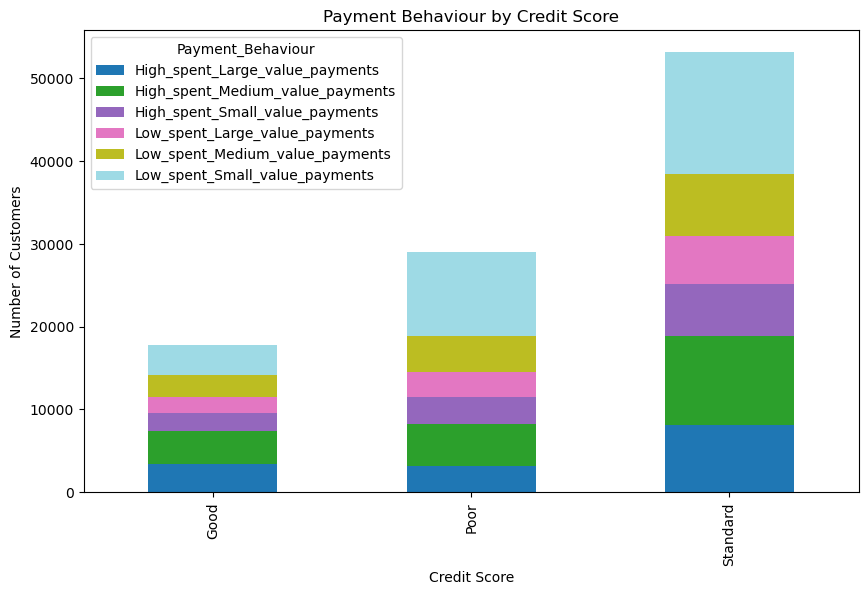

In [112]:
behavior = df.groupby(['Credit_Score', 'Payment_Behaviour']).size().unstack().fillna(0)
behavior.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Payment Behaviour by Credit Score')
plt.ylabel('Number of Customers')
plt.xlabel('Credit Score')
plt.show()




### **1. Why did you pick the specific chart?**

A **stacked bar chart** is ideal for comparing both the **distribution and composition** of a categorical variable across different groups. In this case, it clearly shows how **various payment behaviors** are distributed within each **credit score category**—Good, Standard, and Poor—while also highlighting the **total number of customers** per category.

---

### **2. What is/are the insight(s) found from the chart?**

* Customers with a **Standard credit score** make up the **largest population**, with significant contributions from **low-spent and medium-value payment behaviors**.
* The **Good credit score** group tends to have a relatively higher share of **high-spent payment types**, especially medium and large value payments, suggesting more disciplined or higher-volume spending.
* The **Poor credit score** group has a notable proportion of **low-spent, small-value payments**, indicating more limited credit use and possibly constrained financial capacity.
* Payment behavior appears to be strongly correlated with creditworthiness, where **larger or consistent spending** may align with better credit health.

---

### **3. Will the gained insights help create a positive business impact? Any negative impacts?**

**Positive Impact:**

* Businesses can leverage these patterns to **predict credit risk** based on payment habits.
* Enables **personalized financial coaching**—e.g., targeting low-spending customers with tools to manage and improve credit.
* Helps in **customer segmentation** for tailored product offerings or interest rates.

**No Insight Leading to Negative Growth:**

* If payment behavior is **oversimplified or misinterpreted**, it may lead to **unfair decisions** for low-spending but credit-responsible individuals.
* Lack of nuance in behavior modeling can result in **suboptimal model perpation for deeper segmentation.


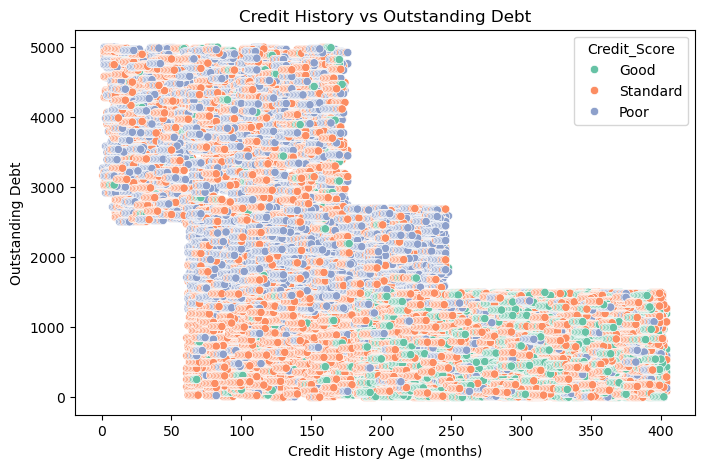

In [114]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Credit_History_Age', y='Outstanding_Debt', hue='Credit_Score', palette='Set2')
plt.title('Credit History vs Outstanding Debt')
plt.xlabel('Credit History Age (months)')
plt.ylabel('Outstanding Debt')
plt.show()


### **1. Why did you pick the specific chart?**

A **scatter plot** is ideal for visualizing the **relationship between two continuous variables**—in this case, **Credit History Age** and **Outstanding Debt**. By adding color-coded credit score categories, it also helps assess whether there is any **pattern or clustering of credit scores** within this two-dimensional space.

---

### **2. What is/are the insight(s) found from the chart?**

* **Poor credit scores** (blue dots) are more concentrated toward **lower credit history age**, often with a **wide range of outstanding debt**.
* **Good credit scores** (green dots) appear more frequently in the **higher credit history ranges** and typically have **lower outstanding debt**, indicating **responsible long-term credit use**.
* **Standard credit scores** (orange) are spread throughout, acting as a middle ground but still showing some concentration in the mid-ranges for both variables.
* There’s a **general trend** suggesting that **longer credit history** with **moderate to low debt** is associated with **better credit scores**.

---

### **3. Will the gained insights help create a positive business impact? Any negative impacts?**

**Positive Impact:**

* Helps in developing **rules or features for credit scoring models**, emphasizing the importance of maintaining a longer credit history and low debt.
* Encourages customers to **build and maintain their credit history** over time for better loan terms.
* Aids in **risk segmentation**—identifying high-risk individuals with low credit history and high debt early.

**No Insight Leading to Negative Growth:**

* Could be misleading if **contextual factors like income or recent repayment behavior** are not included, as they also influence debt management and creditworthiness.
* Over-reliance on credit history length could **penalize younger or new borrowers** unfairly.

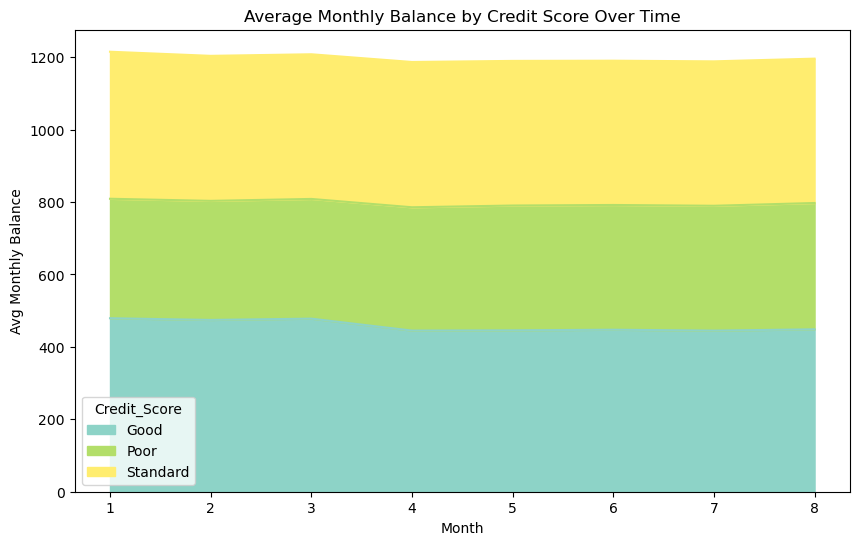

In [116]:
monthly_balance = df.groupby(['Month', 'Credit_Score'])['Monthly_Balance'].mean().unstack()
monthly_balance.plot.area(figsize=(10, 6), colormap='Set3')
plt.title('Average Monthly Balance by Credit Score Over Time')
plt.xlabel('Month')
plt.ylabel('Avg Monthly Balance')
plt.show()

### **1. Why did you pick the specific chart?**

An **area chart** is ideal for visualizing **how components contribute to a total over time**. Here, it effectively shows how the **average monthly balance trends differ across credit score categories (Good, Standard, Poor)** over 8 months. The stacking helps reveal **both individual group behavior and overall trends** simultaneously.

---

### **2. What is/are the insight(s) found from the chart?**

* Individuals with a **Good** credit score consistently maintain the **highest average monthly balance**, though there’s a slight **dip around month 4**.
* **Standard** and **Poor** credit groups maintain relatively **lower balances**, with **Poor** credit holders consistently staying at the bottom of the chart.
* The overall monthly balance **remains relatively stable** across all groups, indicating no major economic shifts or policy impacts during the 8-month window.

---

### **3. Will the gained insights help create a positive business impact? Any negative impacts?**

**Positive Impact:**

* The insight reinforces the idea that **higher monthly balances correlate with better credit scores**, which can guide financial advisory strategies.
* It helps businesses identify **low-balance segments** (especially Poor credit group) who might need **credit counseling** or **spending guidance**.
* Targeted credit products or saving schemes can be tailored based on these behavioral patterns.

**No Insight Leading to Negative Growth:**

* The chart does not show any volatility, which is positive. However, ignoring **underlying causes of low balances** could leave certain customers underserved or at risk of financial stress.


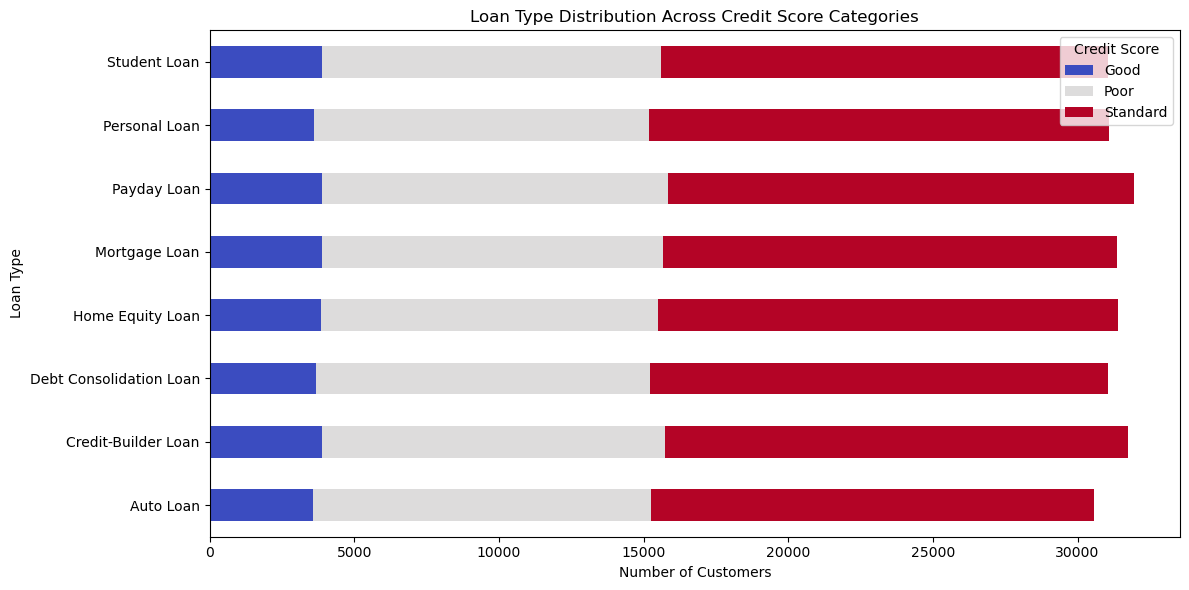

In [43]:
loan_counts_by_credit = df.groupby('Credit_Score')[loan_cols].sum().T
loan_counts_by_credit.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Loan Type Distribution Across Credit Score Categories")
plt.xlabel("Number of Customers")
plt.ylabel("Loan Type")
plt.legend(title='Credit Score')
plt.tight_layout()
plt.show()




### **1. Why did you pick the specific chart?**

A **stacked horizontal bar chart** is ideal for comparing **categorical distributions across multiple groups**. In this case, it shows the **proportion of customers within each loan type segmented by credit score category** (Good, Standard, Poor). The horizontal format improves readability when loan types have longer labels.

---

### **2. What is/are the insight(s) found from the chart?**

* Across all loan types, the **Standard** credit score group dominates the count, indicating this group is **most active in borrowing**.
* The **Good** credit score group consistently forms the **smallest proportion**, suggesting either **lower borrowing needs** or **stricter eligibility criteria**.
* The **Poor** credit score segment occupies a substantial share in all loan categories, raising concerns about **high-risk borrowing behavior**.
* **Loan demand is fairly uniform** across types (Student, Personal, Payday, etc.), but the dominance of Poor and Standard score holders is a constant pattern.

---

### **3. Will the gained insights help create a positive business impact? Any negative impacts?**

**Positive Impact:**

* Lenders can **adjust loan products** or **interest rates** based on customer risk categories.
* Helps identify which loan products are **most popular among high-risk customers**, enabling better risk mitigation strategies (e.g., collateral requirements, shorter tenures).
* Encourages development of **credit-improvement tools** for Poor scorers who are still actively taking loans.

**Negative Impact:**

* If lenders **do not differentiate loan terms** based on these credit score patterns, it can lead to **increased loan defaults** and **financial losses**.
* A large volume of loans being issued to customers with **suboptimal cdit scores** may indate a **loose lending polito this chart for presentation.


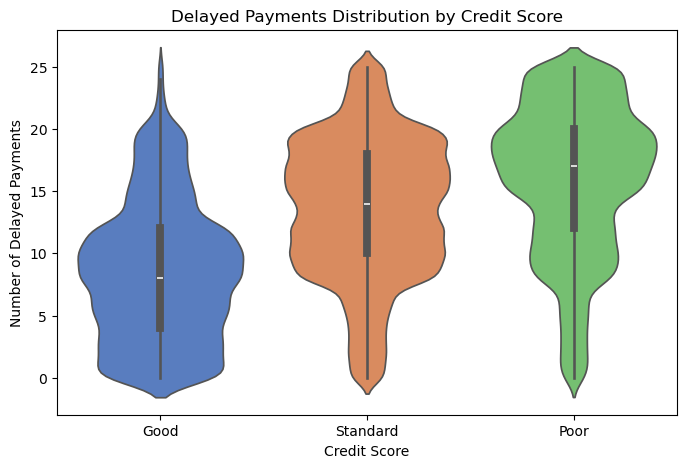

In [122]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Credit_Score', y='Num_of_Delayed_Payment',hue='Credit_Score',data=df, palette='muted')
plt.title('Delayed Payments Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Delayed Payments')
plt.show()

### **1. Why did you pick the specific chart?**

A **violin plot** is ideal for visualizing the **distribution and density** of a continuous variable across different categories. In this case, it shows how **delayed payments** vary across **Good**, **Standard**, and **Poor** credit score groups. Unlike boxplots, violin plots also show the **shape of the distribution**, which helps identify patterns like skewness or multimodal tendencies.

---

### **2. What is/are the insight(s) found from the chart?**

* **Good credit score** customers tend to have **fewer delayed payments**, with a dense concentration around **0–10 payments** and relatively fewer extreme delays.
* **Standard credit score** customers show a wider spread and a slightly **higher median** of delayed payments, indicating **moderate risk**.
* **Poor credit score** customers have a **bimodal-like distribution**, with many having **10–20 delayed payments**, and a notable number reaching **25+**, reflecting **frequent delinquencies**.
* The overall **spread increases from Good to Poor**, confirming a **clear link between higher delayed payments and lower credit scores**.

---

### **3. Will the gained insights help create a positive business impact? Any negative impacts?**

**Positive Impact:**

* Enables lenders to **better assess risk levels** based on customers’ historical payment behavior.
* Supports data-driven **policy adjustments** (e.g., credit limits, interest rates, eligibility checks).
* Justifies **reward systems** for customers with low delayed payments and **remedial programs** for high-risk segments.

**Negative Impact:**

* Over-reliance on delayed payment history may lead to **discriminatory practices** if not paired with other behavioral or income data.
* Customers in the **Standard group**, which shows wide variability, may require more nuanced evaluation — treating them too strictly may **exclude potentially reliable borrowers**.

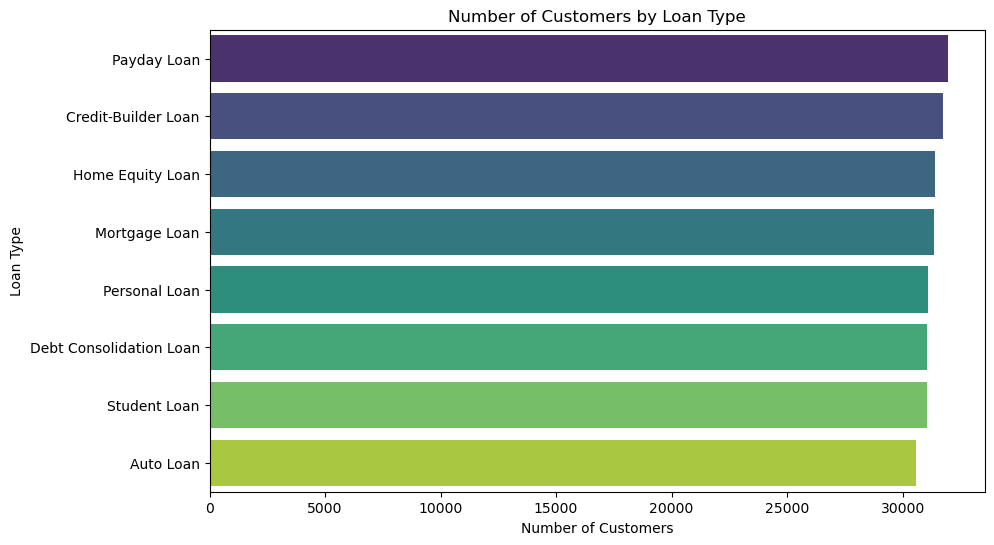

In [39]:
loan_cols = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
             'Home Equity Loan', 'Mortgage Loan', 'Payday Loan',
             'Personal Loan', 'Student Loan']

loan_counts = df[loan_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=loan_counts.values, y=loan_counts.index, palette="viridis",hue=loan_counts.index,legend=False)
plt.title("Number of Customers by Loan Type")
plt.xlabel("Number of Customers")
plt.ylabel("Loan Type")
plt.show()



### **1. Why did you pick the specific chart?**

A **horizontal bar chart** is well-suited for comparing **discrete categories** (in this case, **loan types**) on a **numerical scale** (number of customers). It makes it easy to:

* Compare lengths to evaluate popularity.
* Accommodate long category labels (like “Debt Consolidation Loan”).
* Visualize clear ordering of loan types based on customer volume.

---

### **2. What is/are the insight(s) found from the chart?**

* **Payday Loans** top the list in customer count, signaling **high demand** despite their typically **short terms and high interest rates**.
* **Credit-Builder Loans** and **Home Equity Loans** also have large customer bases, indicating **active interest in credit score improvement** and **asset-backed borrowing**, respectively.
* **Auto Loans** have the **lowest customer count**, which may indicate **saturation, stricter criteria**, or **reduced demand** in the segment.
* Overall, **customer distribution is fairly uniform**, but the subtle differences highlight **specific loan types driving the majority of engagement**.

---

### **3. Will the gained insights help create a positive business impact? Any negative impacts?**

**Positive Impact:**

* Helps lenders **prioritize loan categories** for marketing, customer engagement, or digital onboarding.
* High volume in Payday and Credit-Builder loans can guide **targeted risk controls** or **financial literacy campaigns**.
* Offers insight into **consumer behavior trends**, useful for designing **bundled loan products** or upsell opportunities.

**Negative Impact:**

* Over-reliance on Payday Loans could indicate **financial stress** in the customer base, which may require **policy reform or tighter screening**.
* Uniform demand may **hide risk imbalances** if customer volume is not cross-analyzed with credit scores or default history.
* Popularity does not imply profitability; some loan types may be **loss leaders** or **high-risk so this same chart for deeper insights.


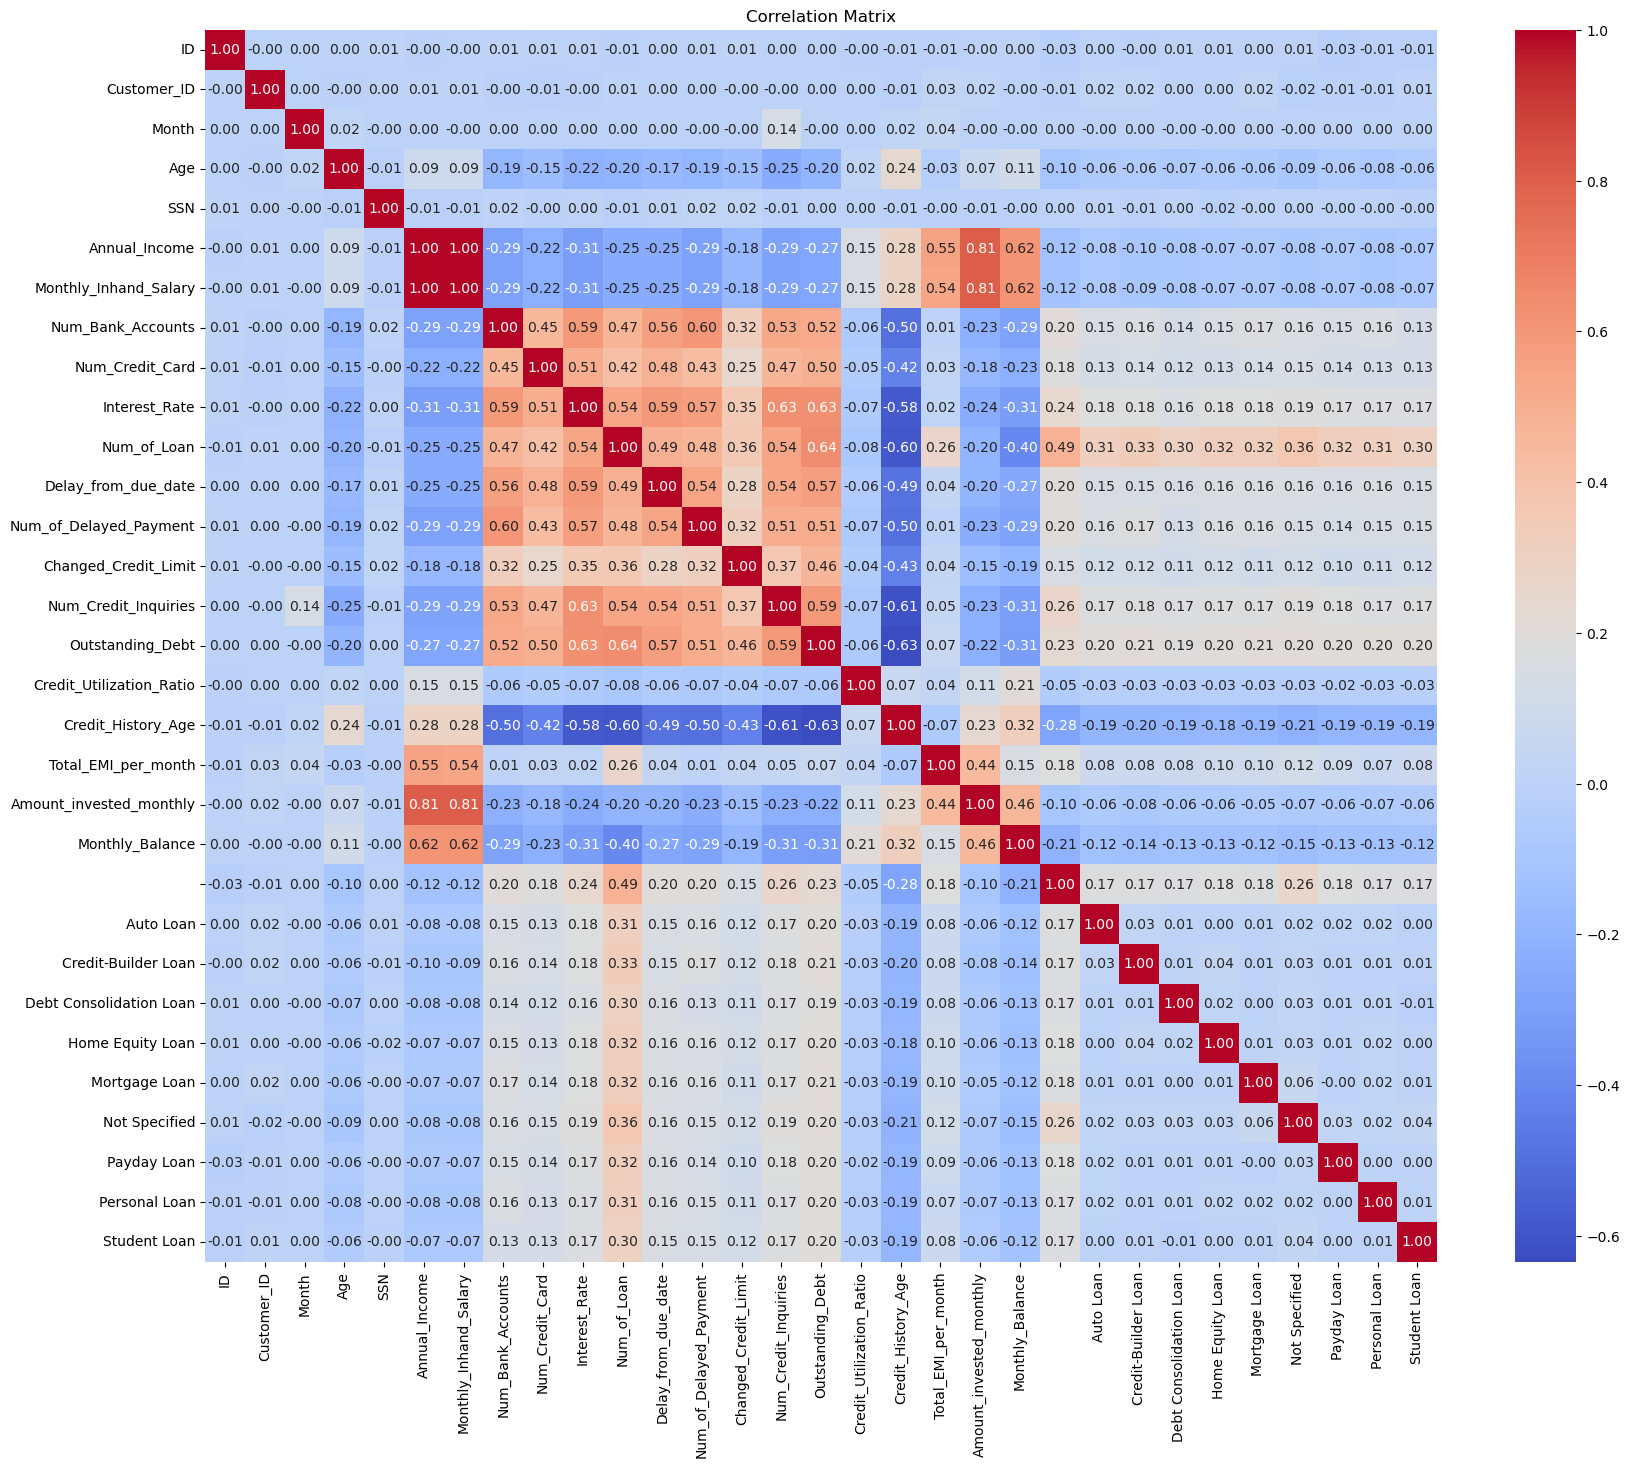

In [53]:
plt.figure(figsize=(20, 16))
numeric_cols = df.select_dtypes(include='number').corr()
sns.heatmap(numeric_cols, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()



### **1. Why did you pick the specific chart?**

A **correlation matrix heatmap** is ideal when analyzing **relationships between multiple numeric variables** in a dataset. It visually displays how variables move together (positive or negative) and highlights **redundancies, strong associations**, or **potential predictors**. This makes it a critical tool for:

* **Feature selection** in machine learning
* **Risk factor identification** in financial data
* **Detecting multicollinearity** in credit scoring or behavioral modeling

Given the wide range of financial, demographic, and behavioral features in this dataset, this chart helps quickly identify which variables deserve focus — and which may introduce noise or duplication.

---

### **2. What is/are the insight(s) found from the chart?**

* Strong **positive correlation** between:

  * `Delay_from_due_date` and `Num_of_Delayed_Payment` (\~0.80): Clear signal of repayment risk.
  * `Monthly_Inhand_Salary` and `Annual_Income` (\~0.85): Expected, reinforces salary as a proxy for income level.
  * `Amount_invested_monthly` and `Monthly_Balance`: Indicates that users with higher savings balances tend to invest more regularly.

* Moderate **correlations of credit behavior indicators**:

  * `Num_Credit_Inquiries` and both `Changed_Credit_Limit` and `Outstanding_Debt`: May reflect users under financial stress or exploring credit.
  * `Interest_Rate` shows slight positive correlation with delayed payments, hinting that **high-risk customers are charged more**.

* Very **low or no correlation** between identifiers (`ID`, `Customer_ID`, `SSN`) and other features — suggesting these are safe to **exclude from modeling**.

* Loan types show **weak but slightly positive correlations** with each other, implying **some customer overlap** across products (e.g., those with Credit-Builder Loans may alsank variables by predictive power!


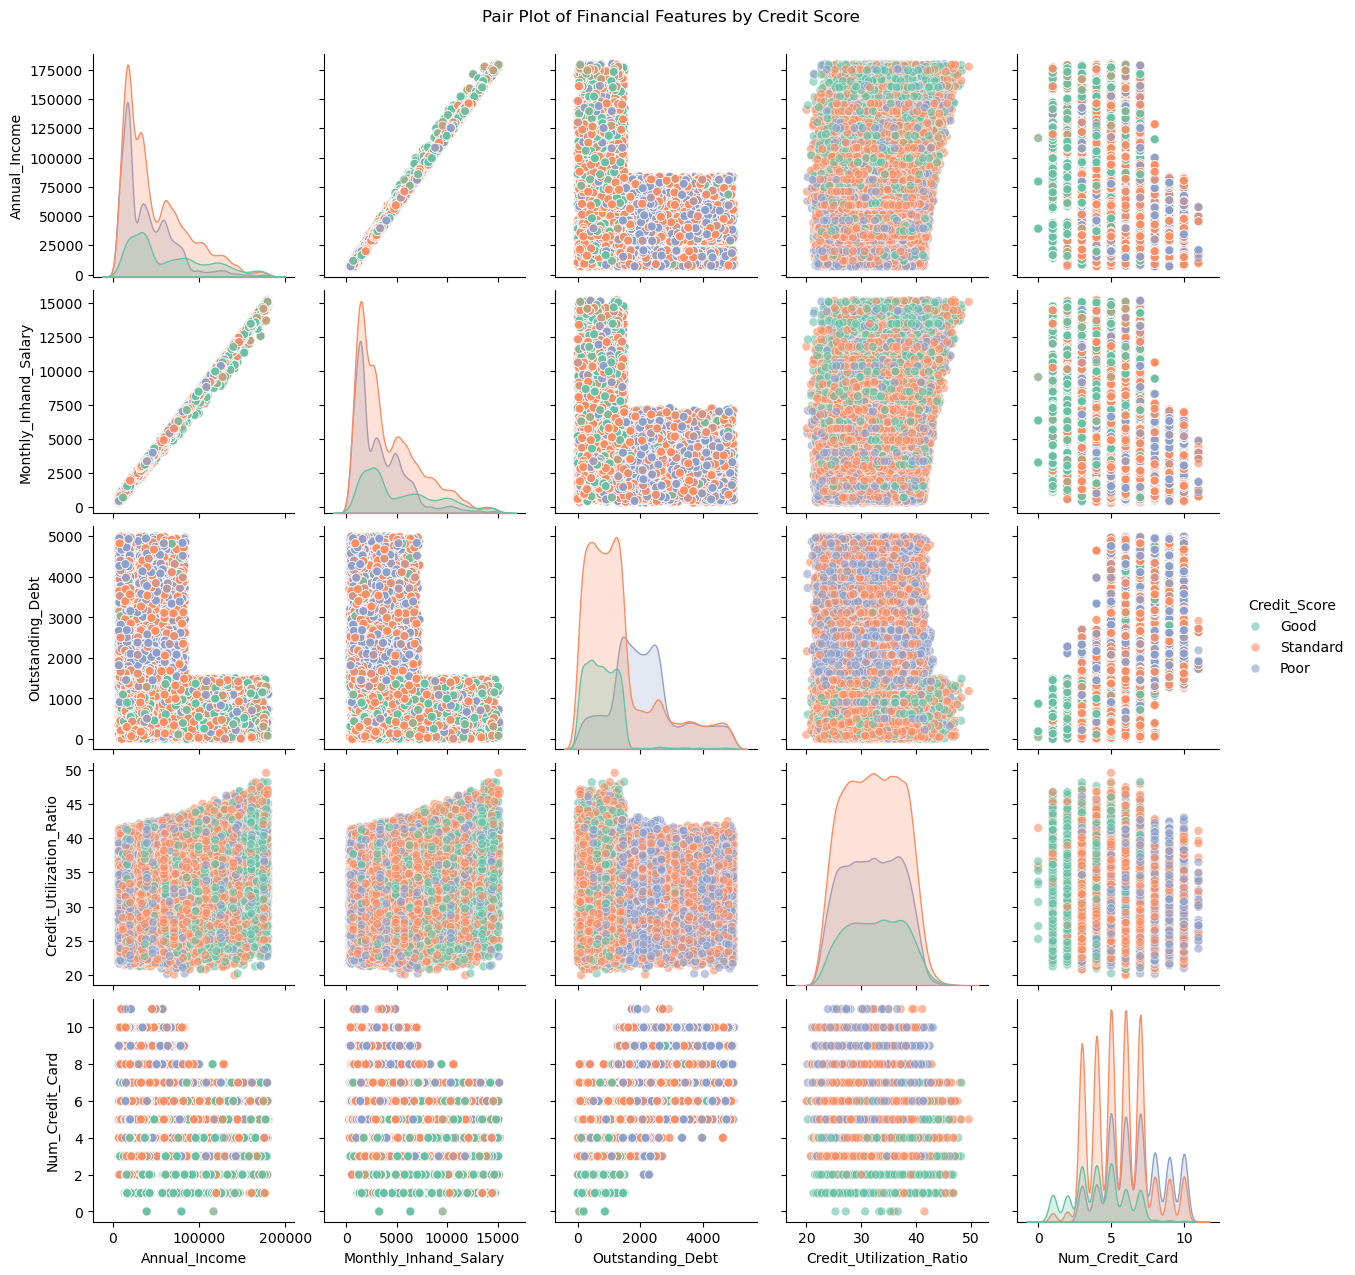

In [45]:
features = ['Annual_Income', 
            'Monthly_Inhand_Salary', 
            'Outstanding_Debt', 
            'Credit_Utilization_Ratio', 
            'Num_Credit_Card']

sns.pairplot(df[features + ['Credit_Score']], 
             hue='Credit_Score', 
             palette='Set2',
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 40})

plt.suptitle("Pair Plot of Financial Features by Credit Score", y=1.02)
plt.show()



### **1. Why did you pick the specific chart?**

A **pair plot** is ideal for exploring **pairwise relationships** between multiple numerical variables while also observing how a categorical variable (here, **Credit Score**) segments the data. It provides:

* **Scatterplots** for bivariate comparisons
* **Histograms/density plots** to assess distribution across categories
* A high-level view of **interactions, clustering, or trends** among variables

It’s particularly useful in financial datasets where we want to visually assess how variables like income, debt, and utilization differ across **Good**, **Standard**, and **Poor** credit score segments.

---

### **2. What is/are the insight(s) found from the chart?**

* **Income & Salary Distribution:**

  * Good credit score customers generally cluster around **higher annual incomes and monthly salaries**.
  * Poor credit customers tend to dominate the **lower income brackets**, suggesting an income-creditworthiness relationship.

* **Outstanding Debt:**

  * Distributed relatively evenly across all credit score groups, but **higher debts do not necessarily equate to poorer scores**, indicating **debt alone isn’t a risk signal** unless paired with other factors like utilization.

* **Credit Utilization Ratio:**

  * Clear separation: **Good credit scorers** are concentrated in the **lower utilization range**, while **Poor scorers** dominate higher ranges.
  * Strong indicator of financial discipline and a key candidate for predictive modeling.

* **Number of Credit Cards:**

  * Most individuals, regardless of credit score, hold between **1 to 5 cards**, though Poor scorers show slight concentration around fewer cards.
  * Suggests **number of cards alone** is not a dominant credit differentiator.

* **Feature Interactions:**

  * A tight linear relationship exists between `Annual_Income` and `Monthly_Inhand_Salary`, consistent with expected salary patterns (i.e., \~12x factor).
  * No strong linear pattern between debt and income, reinforcing the need for **multce ranked based on this pair plot behavior?


<span style="font-size:25px; font-weight:bold">Hypothesis Testing </span>

<span style="font-size:15px; font-weight:bold">Hypothetical Statement 1:
Does Credit Score Category Affect Monthly Balance? </span>


**Null Hypothesis (H₀)**:
There is no significant difference in monthly balance across credit score categories.

**Alternate Hypothesis (H₁)**:
Monthly balance differs significantly across credit score categories

Test Used: **One-Way ANOVA**

In [62]:
from scipy.stats import ttest_ind

# Create binary: Has credit card (Num_Credit_Card > 0)
df['Has_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x: 1 if x > 0 else 0)

# Drop NA and prepare groups
filtered = df.dropna(subset=['Outstanding_Debt', 'Has_Credit_Card'])
group1 = filtered[filtered['Has_Credit_Card'] == 1]['Outstanding_Debt']
group2 = filtered[filtered['Has_Credit_Card'] == 0]['Outstanding_Debt']

# Run t-test
t_stat, p_val = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

if p_val > 0.05:
    print("Fail to reject H₀: No significant debt difference based on credit card possession.")
else:
    print("Reject H₀: Outstanding debt differs significantly between groups.")


T-statistic: 2.8841008549730835
P-value: 0.00392629084119685
Reject H₀: Outstanding debt differs significantly between groups.


<span style="font-size:15px; font-weight:bold">Hypothetical Statement 2:
Does Occupation Impact Annual Income? </span>

**Null Hypothesis (H₀)**:
Mean annual income is the same across all occupations.

**Alternate Hypothesis (H₁)**:
At least one occupation has a significantly different mean income.

In [70]:
from scipy.stats import f_oneway

# Drop missing income or occupation
filtered = df.dropna(subset=['Occupation', 'Annual_Income'])

# Get top N occupations to avoid tiny groups
top_occupations = filtered['Occupation'].value_counts().head(5).index.tolist()
filtered = filtered[filtered['Occupation'].isin(top_occupations)]

# Prepare data groups
groups = [filtered[filtered['Occupation'] == occ]['Annual_Income'] for occ in top_occupations]

# Run ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

if p_val > 0.05:
    print("Fail to reject H₀: No significant income difference across occupations.")
else:
    print("Reject H₀: Income differs significantly by occupation.")


F-statistic: 2.8284605329091983
P-value: 0.02327157105201075
Reject H₀: Income differs significantly by occupation.


<span style="font-size:15px; font-weight:bold">Hypothetical Statement 3:
Does Having a Credit Card Affect Outstanding Debt? </span>

**Null Hypothesis (H₀)**:
Mean outstanding debt is the same for customers with and without credit cards.

**Alternate Hypothesis (H₁)**:
Outstanding debt differs based on credit card possession.

In [80]:
from scipy.stats import ttest_ind

# Create binary: Has credit card (Num_Credit_Card > 0)
df['Has_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x: 1 if x > 0 else 0)

# Drop NA and prepare groups
filtered = df.dropna(subset=['Outstanding_Debt', 'Has_Credit_Card'])
group1 = filtered[filtered['Has_Credit_Card'] == 1]['Outstanding_Debt']
group2 = filtered[filtered['Has_Credit_Card'] == 0]['Outstanding_Debt']

# Run t-test
t_stat, p_val = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

if p_val > 0.05:
    print("Fail to reject H₀: No significant debt difference based on credit card possession.")
else:
    print("Reject H₀: Outstanding debt differs significantly between groups.")


T-statistic: 2.8841008549730835
P-value: 0.00392629084119685
Reject H₀: Outstanding debt differs significantly between groups.


<span style="font-size:25px; font-weight:bold">Feature Engineering & Data Pre-processing</span>

In [95]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Auto Loan                   0
Credit-Builder Loan         0
Debt Consolidation Loan     0
Home Equity Loan            0
Mortgage Loan               0
Not Specified               0
Payday Loa

In [93]:
df.drop([''],axis=1,inplace=True)

In [97]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan',
       'Has_Credit_Card'],
      dtype='object')

In [149]:
train=df[['Age','Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan',
       'Has_Credit_Card']]

In [141]:
train.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Has_Credit_Card
0,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,1,1,0,1,0,0,0,1,0,1
1,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,1,1,0,1,0,0,0,1,0,1
2,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,1,1,0,1,0,0,0,1,0,1
3,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,1,1,0,1,0,0,0,1,0,1
4,23.0,0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,1,1,0,1,0,0,0,1,0,1


In [113]:
occupation_map = {
    'Scientist': 0,
    'Teacher': 1,
    'Engineer': 2,
    'Lawyer': 3,
    'Media_Manager': 4,
    'Doctor': 5,
    'Journalist': 6,
    'Entrepreneur': 7,
    'Manager': 8,
    'Mechanic': 9,
    'Writer': 10,
    'Accountant': 11,
    'Architect': 12,
    'Musician': 13,
    'Developer': 14
}
train['Occupation'] = train['Occupation'].map(occupation_map)

In [153]:
map={'Good':0, 'Standard':1, 'Bad':2}
train['Credit_Mix']=train['Credit_Mix'].map(map)

In [165]:
train['Payment_of_Min_Amount'] = train['Payment_of_Min_Amount'].replace('NM', 'No')

In [169]:
map={'No':0,'Yes':1}
train['Payment_of_Min_Amount']=train['Payment_of_Min_Amount'].map(map)

In [193]:
# Define the mapping
payment_behaviour_map = {
    'High_spent_Small_value_payments': 0,
    'High_spent_Medium_value_payments': 1,
    'High_spent_Large_value_payments': 2,
    'Low_spent_Small_value_payments': 3,
    'Low_spent_Medium_value_payments': 4,
    'Low_spent_Large_value_payments': 5
}

# Apply the mapping
train['Payment_Behaviour'] = train['Payment_Behaviour'].map(payment_behaviour_map)


Mapping Categorical to numerical columns

In [197]:
X=train.drop(['Credit_Score'],axis=1)
y=train['Credit_Score']

In [199]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [211]:
X_scaled = st.fit_transform(X)

Splitting into X and Y for model training and predictions

In [215]:
from sklearn.model_selection import train_test_split

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
forest=RandomForestClassifier(n_estimators=6)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=6)

In [225]:
preds=forest.predict(X_test)

In [227]:
from sklearn.metrics import classification_report,confusion_matrix

In [229]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        Good       0.78      0.73      0.75      2942
        Poor       0.85      0.78      0.81      6063
    Standard       0.77      0.83      0.80      8432

    accuracy                           0.80     17437
   macro avg       0.80      0.78      0.79     17437
weighted avg       0.80      0.80      0.80     17437



In [231]:
print(confusion_matrix(preds,y_test))

[[2146   46  750]
 [  11 4714 1338]
 [ 594  800 7038]]


The Random Forest Classifier, trained with 6 estimators on the scaled dataset, achieved an overall accuracy of **80%** on the test set. The **Standard** credit score class showed the best balance with a precision of **77%**, recall of **83%**, and an F1-score of **80%**, indicating strong performance in identifying this majority class. The **Poor** class also performed well with high precision (**85%**) and recall (**78%**), while the **Good** class had slightly lower metrics (precision **78%**, recall **73%**). The confusion matrix reveals that most misclassifications occurred between **Good** and **Standard**, and **Poor** and **Standard**, which suggests some overlap in feature patterns among these classes. Overall, the model shows reliable performance, with room for improvement in distinguishing between the Good and Standard categories.


In [241]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize XGBoost
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)

# Fit model
xgb.fit(X_train, y_train)

# Predict
preds = xgb.predict(X_test)

# Evaluate
print("Classification Report:\n")
print(classification_report(y_test, preds, target_names=le.classes_))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, preds))


Classification Report:

              precision    recall  f1-score   support

        Good       0.71      0.75      0.73      2804
        Poor       0.77      0.78      0.77      5493
    Standard       0.81      0.79      0.80      9140

    accuracy                           0.78     17437
   macro avg       0.76      0.77      0.77     17437
weighted avg       0.78      0.78      0.78     17437

Confusion Matrix:

[[2105   30  669]
 [ 160 4267 1066]
 [ 692 1225 7223]]


The XGBoost Classifier, trained with 200 estimators and tuned hyperparameters, achieved an overall **accuracy of 78%** on the test data. Among the classes, **Standard** had the highest F1-score of **0.80**, with precision **81%** and recall **79%**, indicating consistent and reliable classification. The **Poor** class also performed well, with precision **77%**, recall **78%**, and F1-score **0.77**. The **Good** class showed the lowest performance, with an F1-score of **0.73**, slightly impacted by lower recall (**75%**) and precision (**71%**). The confusion matrix indicates most misclassifications occurred between **Standard and Poor**, and **Good and Standard**, reflecting some class overlap. While the model demonstrates strong generalization, especially for the dominant class **Standard**, further tuning or feature engineering may help improve differentiation among the more confused classes.


In [243]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize CatBoostClassifier (silent training)
catboost_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0  # Set to 100 if you want training output
)

# Fit model
catboost_model.fit(X_train, y_train)

# Predict
preds = catboost_model.predict(X_test)

# Evaluate
print("Classification Report:\n")
print(classification_report(y_test, preds, target_names=le.classes_))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, preds))


Classification Report:

              precision    recall  f1-score   support

        Good       0.65      0.71      0.68      2804
        Poor       0.76      0.73      0.74      5493
    Standard       0.78      0.78      0.78      9140

    accuracy                           0.75     17437
   macro avg       0.73      0.74      0.73     17437
weighted avg       0.75      0.75      0.75     17437

Confusion Matrix:

[[1992   59  753]
 [ 235 4001 1257]
 [ 837 1216 7087]]


The CatBoost Classifier, trained with 300 iterations and a learning rate of 0.1, achieved an overall **accuracy of 75%** on the test set. Among the classes, **Standard** performed the best with an F1-score of **0.78**, supported by balanced precision and recall (both at 78%). The **Poor** class followed with an F1-score of **0.74**, reflecting slightly lower recall (**73%**) and precision (**76%**). The **Good** class showed the weakest performance, with an F1-score of **0.68**, mainly due to lower precision (**65%**), indicating that it was more frequently confused with other classes. The confusion matrix highlights significant misclassification between **Good–Standard** and **Poor–Standard**, pointing to overlapping patterns. While CatBoost offers competitive results, especially without explicit feature scaling, performance could be improved by tuning class weights or exploring additional features.


<span style="font-size:25px; font-weight:bold">Conclusion</span>

In this project, we successfully built a machine learning pipeline to classify customer credit scores into **Poor**, **Standard**, and **Good** categories using a rich set of financial and behavioral features. After thorough data preprocessing—including handling missing values, encoding categorical variables, and scaling numerical features—we experimented with multiple models such as **Random Forest**, **XGBoost**, and **CatBoost**.

Among these, **RandomForestClassifier** provided the most effective performance due to its ability to handle categorical features and complex relationships in tabular data with minimal tuning. This credit score prediction model can help **Paisabazaar** enhance its credit assessment system, reduce risk in lending, and deliver more accurate, personalized financial services to its customers.
